In [2]:
# Description: The program uses the recurrent artificial neural network called Long Short Term Memory (LSTM)
            #  to predict the closing price of Apple corporation.

In [3]:
# To predict closing price of a stock with input of past 60 days stock price.

In [4]:
# 1) Do the same for any other company
# 2) Preidct the next 10 days price on the basis of past 500 days.
# 3) Apply inverse transform on above data.

In [5]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from datetime import date

In [6]:
#Load The Required Stock Data
startDate = pd.to_datetime('2012-01-01')
endDate = pd.to_datetime(date.today())
df = web.DataReader('MSFT', data_source = 'stooq', start = startDate, end = endDate)
df = df.reindex(index = df.index[::-1])
print(df)

                Open      High       Low     Close        Volume
Date                                                            
2012-01-03   21.2343   21.6175   21.1648   21.4576  8.072523e+07
2012-01-04   21.5083   22.0284   21.4745   21.9689  1.004093e+08
2012-01-05   21.9620   22.2399   21.8845   22.1972  6.993688e+07
2012-01-06   22.1049   22.6043   22.0721   22.5328  1.240285e+08
2012-01-09   22.4911   22.5328   22.2301   22.2468  7.445802e+07
...              ...       ...       ...       ...           ...
2023-07-10  334.6000  335.2300  327.5900  331.8300  3.279145e+07
2023-07-11  331.0600  332.8600  327.0000  332.4700  2.669822e+07
2023-07-12  336.6000  341.6520  335.6700  337.2000  2.999526e+07
2023-07-13  339.5600  343.7400  339.0200  342.6600  2.056716e+07
2023-07-14  347.5900  351.4300  344.3100  345.2400  2.835273e+07

[2901 rows x 5 columns]


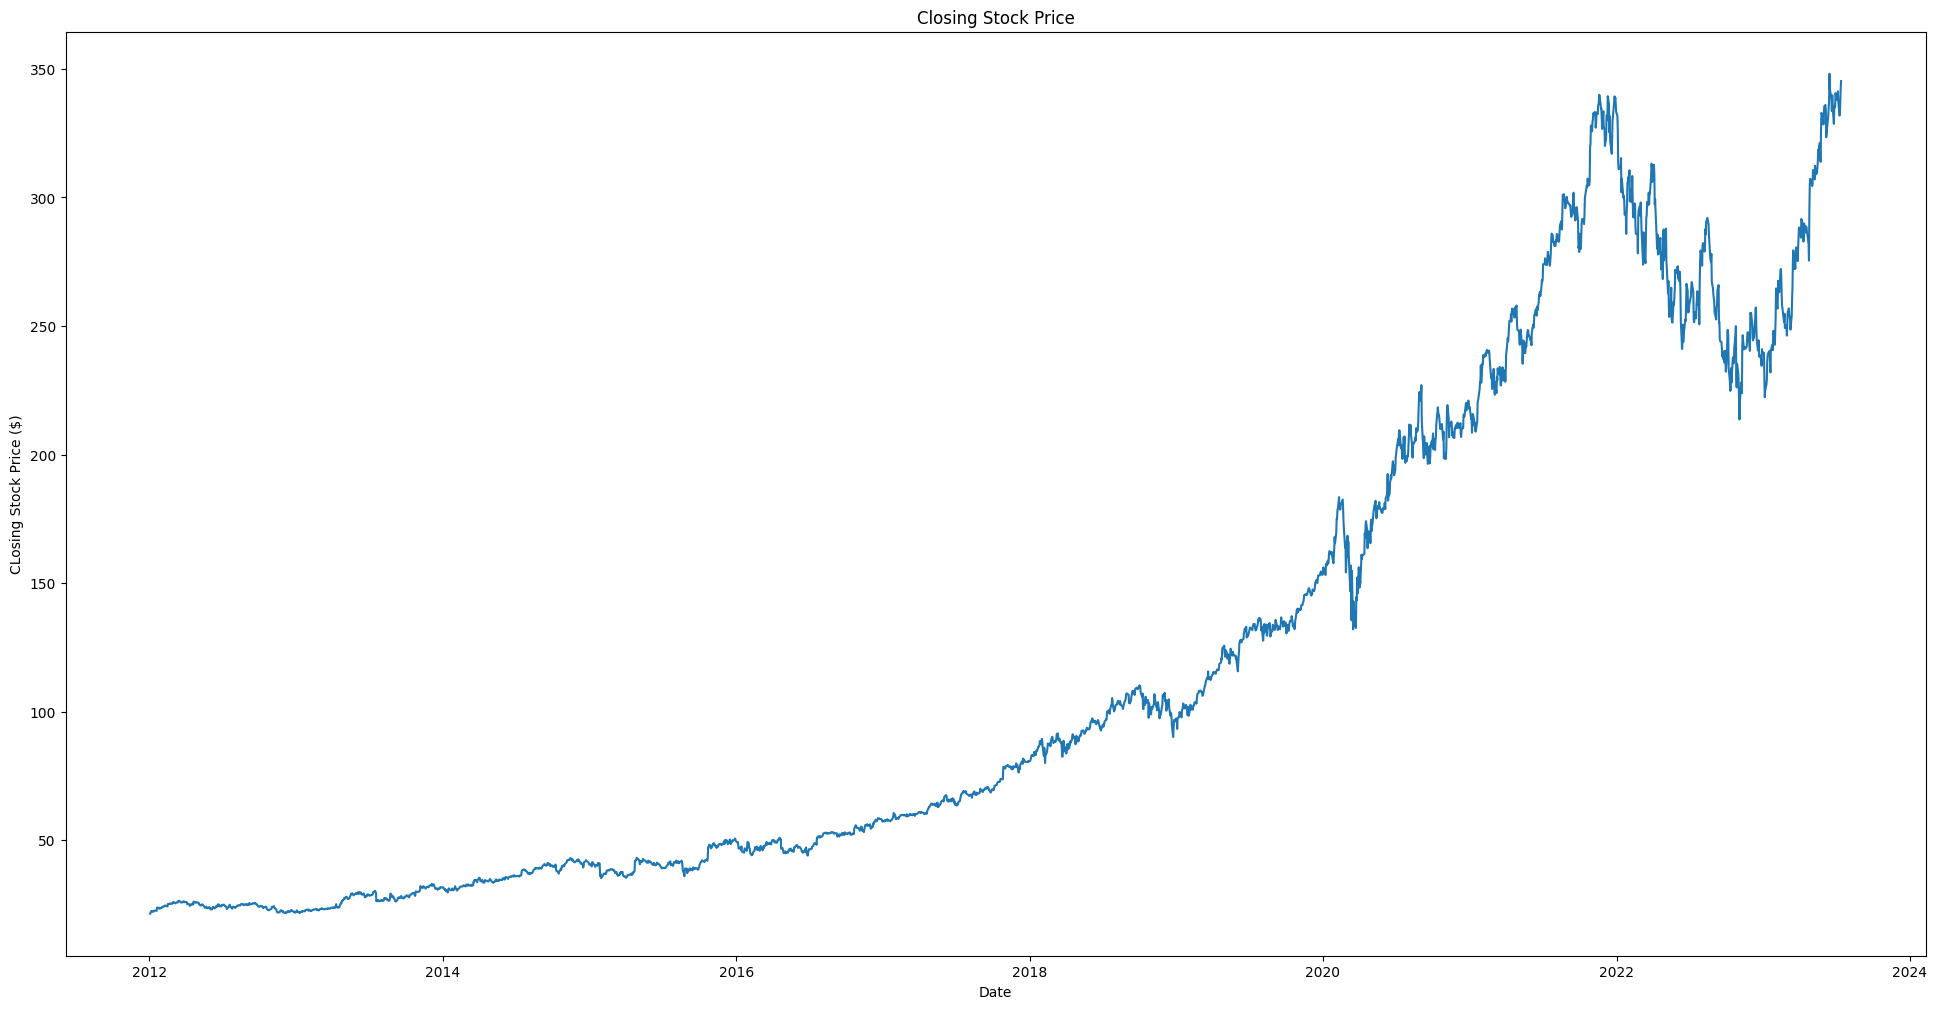

In [7]:
#Visualize the Closing Stock Price History
plt.figure(figsize=(24,12))
plt.title("Closing Stock Price")
plt.plot(df['Close'])
plt.xlabel("Date")
plt.ylabel("CLosing Stock Price ($)")
plt.show()

In [8]:
#Create A New DataFrame with only Close column
data = df.filter(['Close'])
#Convert DataFrame To Numpy Array
dataset = data.values

# Training -> 80% data
# Testing -> 20% data

training_data_len = math.ceil((len(dataset)) * 0.8)
print(training_data_len)

2321


In [9]:
print(dataset)

[[ 21.4576]
 [ 21.9689]
 [ 22.1972]
 ...
 [337.2   ]
 [342.66  ]
 [345.24  ]]


In [10]:
#Scale The Data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.        ]
 [0.00156532]
 [0.00226425]
 ...
 [0.96663017]
 [0.9833457 ]
 [0.99124425]]


In [11]:
#Create The Scaled Trained DataSet
train_data = scaled_data[0:training_data_len:]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [12]:
#Create The Scaled Trained DataSet
train_data_2 = scaled_data[0:training_data_len:]
x_train_2 = []
y_train_2 = []
for i in range(100, len(train_data)):
  x_train_2.append(train_data[i-100:i,0])
  y_train_2.append(train_data[i:i+3,0])

In [13]:
print(x_train_2[0])
print(y_train_2[0])

[0.         0.00156532 0.00226425 0.00329167 0.0024161  0.00265336
 0.00236773 0.00304829 0.0036716  0.00368078 0.0036168  0.00333729
 0.00724891 0.0072884  0.00633996 0.00688398 0.00673489 0.00606933
 0.00699358 0.00681449 0.00769557 0.00783242 0.00853747 0.00844042
 0.00881392 0.00957714 0.00984165 0.00918497 0.00938243 0.00906312
 0.00855859 0.01160413 0.01152514 0.01200548 0.01157688 0.0118319
 0.01210253 0.01177741 0.01306597 0.0127286  0.01410839 0.01357968
 0.01289606 0.01228806 0.01299617 0.01341253 0.01335773 0.01347957
 0.01503571 0.01529991 0.01548237 0.01486519 0.01387787 0.01335773
 0.01316639 0.01338804 0.01341253 0.01483794 0.01466466 0.01385031
 0.01368285 0.01403553 0.01410839 0.01323313 0.01143697 0.01218795
 0.01116358 0.00960102 0.00928538 0.01086571 0.01045241 0.01111491
 0.01202079 0.01126094 0.01093551 0.01442189 0.01368285 0.01318169
 0.01387787 0.01365254 0.01332466 0.01341253 0.01340947 0.01289606
 0.01277728 0.01086877 0.01004187 0.00968031 0.01033056 0.01027

In [14]:
#Convert The x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
#Resize The Arrays
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [15]:
unscaled_data = scaler.inverse_transform(dataset)
print(unscaled_data)

[[  7030.41956224]
 [  7197.43182136]
 [  7272.00428128]
 ...
 [110165.27488   ]
 [111948.742384  ]
 [112791.479776  ]]


In [16]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [17]:
# Build The Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1))) # Input Layer
model.add(LSTM(50, return_sequences = False)) # Long Term Memory Layer
model.add(Dense(25)) # Short Term Memory Layer
model.add(Dense(1)) # Forget Gate

In [18]:
# Compile The Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size = 100, epochs = 64)

Epoch 1/64
23/23 [==============================] - 4s 55ms/step - loss: 0.0074
Epoch 2/64
23/23 [==============================] - 1s 54ms/step - loss: 4.4349e-04
Epoch 3/64
23/23 [==============================] - 1s 53ms/step - loss: 1.8100e-04
Epoch 4/64
23/23 [==============================] - 1s 54ms/step - loss: 1.1477e-04
Epoch 5/64
23/23 [==============================] - 1s 64ms/step - loss: 1.0779e-04
Epoch 6/64
23/23 [==============================] - 2s 74ms/step - loss: 1.0751e-04
Epoch 7/64
23/23 [==============================] - 1s 54ms/step - loss: 1.0494e-04
Epoch 8/64
23/23 [==============================] - 1s 53ms/step - loss: 1.0931e-04
Epoch 9/64
23/23 [==============================] - 1s 54ms/step - loss: 1.0731e-04
Epoch 10/64
23/23 [==============================] - 1s 54ms/step - loss: 1.1073e-04
Epoch 11/64
23/23 [==============================] - 1s 54ms/step - loss: 1.1084e-04
Epoch 12/64
23/23 [==============================] - 1s 54ms/step - loss: 1.10

In [19]:
# Create a Testing Dataset
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len :, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [20]:
# Convert Data Into Numpy Array
x_test = np.array(x_test)
# Reshape The Data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
# Get The Model Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print("Error % = ", rmse)
print("Accuracy % = ", (100-rmse))

19/19 [==============================] - 1s 11ms/step
Error % =  7.579456503528478
Accuracy % =  92.42054349647152


<ipython-input-24-c8af41b10fce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


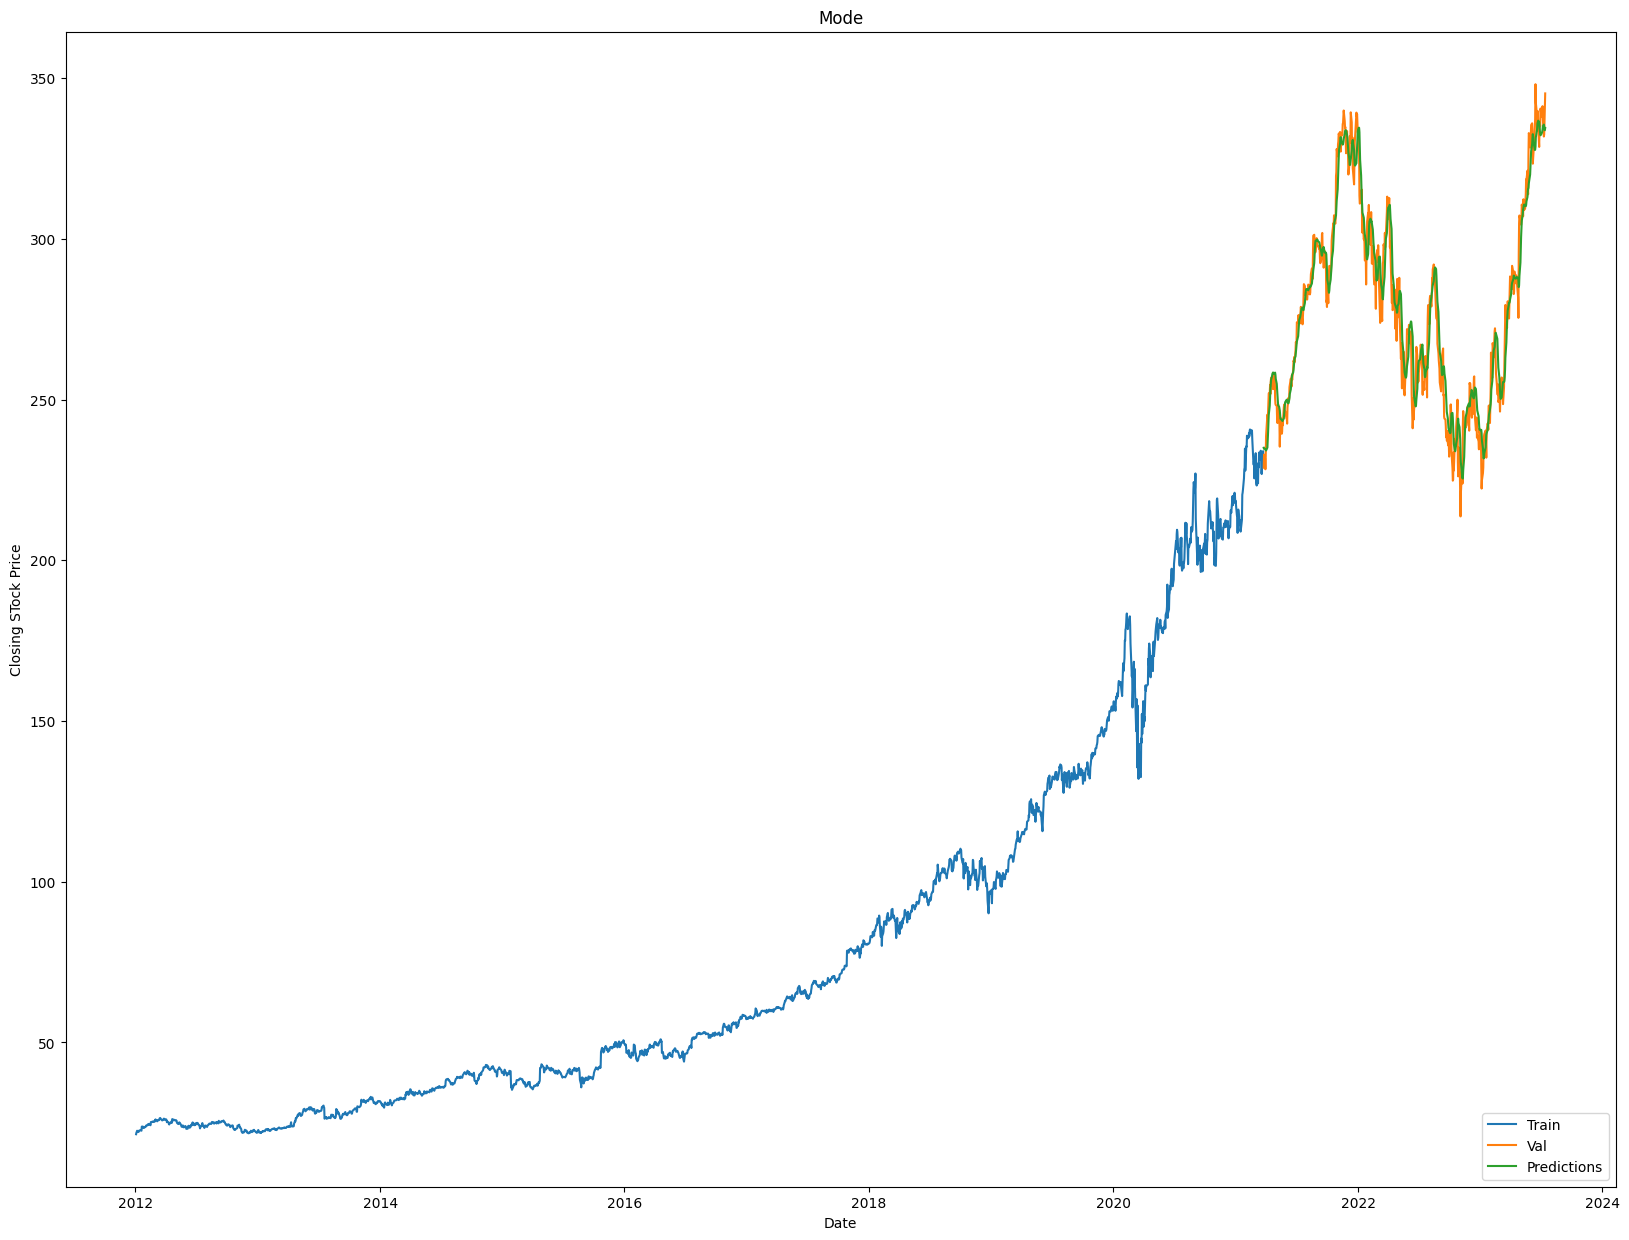

In [24]:
# Plot The Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(20,15))
plt.title("Mode")
plt.xlabel("Date")
plt.ylabel("Closing STock Price")
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [23]:
# Use Model to Predict Future Price
MSFT_quote = web.DataReader('MSFT', data_source = 'stooq', start = startDate, end = endDate)
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[:60].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 19ms/step
[[169.27072]]
